In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 4000
pd.options.display.float_format = '{:.3f}'.format 
np.set_printoptions(suppress=True, precision=5)

## TIỀN XỬ LÝ DỮ LIỆU

In [3]:
df = pd.read_csv(r'E:\learn st new\Credit score\loan_data_2007_2014.csv', low_memory= False)
df.shape

(466285, 75)

In [5]:
df.drop_duplicates(subset = 'id')
df.shape

(466285, 75)

In [7]:
# % Dữ liệu null trong dataset

pct_missing_value = 100* df.isnull().sum()/df.shape[0]
pct_missing_value

Unnamed: 0                      0.000
id                              0.000
member_id                       0.000
loan_amnt                       0.000
funded_amnt                     0.000
funded_amnt_inv                 0.000
term                            0.000
int_rate                        0.000
installment                     0.000
grade                           0.000
sub_grade                       0.000
emp_title                       5.917
emp_length                      4.505
home_ownership                  0.000
annual_inc                      0.001
verification_status             0.000
issue_d                         0.000
loan_status                     0.000
pymnt_plan                      0.000
url                             0.000
desc                           72.982
purpose                         0.000
title                           0.004
zip_code                        0.000
addr_state                      0.000
dti                             0.000
delinq_2yrs 

In [8]:
# Loại bỏ những column có khuyết thiếu nhiều
df2 = df.drop(columns = [x for x in pct_missing_value[pct_missing_value >= 70].index])
df2 = df2.drop(columns = ['Unnamed: 0','zip_code'], axis =0)

In [6]:
df2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.000,36 months,10.650,162.870,B,B2,...,171.620,NaN,Jan-16,0.000,1,INDIVIDUAL,0.000,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.000,60 months,15.270,59.830,C,C4,...,119.660,NaN,Sep-13,0.000,1,INDIVIDUAL,0.000,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.000,36 months,15.960,84.330,C,C5,...,649.910,NaN,Jan-16,0.000,1,INDIVIDUAL,0.000,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.000,36 months,13.490,339.310,C,C1,...,357.480,NaN,Jan-15,0.000,1,INDIVIDUAL,0.000,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.000,60 months,12.690,67.790,B,B5,...,67.790,Feb-16,Jan-16,0.000,1,INDIVIDUAL,0.000,NaN,NaN,NaN


In [9]:
# Xử lý các biến định tính
cat_col = []
for x in df2.dtypes.index:
    if df2.dtypes[x] == 'object':
        cat_col.append(x)

for col in cat_col:
    print(col)
    print(df2[col].unique())
    print()

term
[' 36 months' ' 60 months']

grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']

sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']

emp_title
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']

emp_length
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

verification_status
['Verified' 'Source Verified' 'Not Verified']

issue_d
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-

In [10]:
# các cột url và emp_title không có ý nghĩa nên loại ra khỏi đầu vào cho mô hình
df2 = df2.drop(columns = ['url','emp_title'])

In [11]:
# Các kỳ hạn đổi sang dạng số
df2['term'] = df2['term'].str.replace('36 months', str(36))
df2['term'] = df2['term'].str.replace('60 months', str(60))
df2['term'].head(5)

0     36
1     60
2     36
3     36
4     60
Name: term, dtype: object

In [14]:
# Chuyển các ngày tháng sang đúng dạng datetime
df2['earliest_cr_line'] = pd.to_datetime(df2['earliest_cr_line'],format = '%b-%y')
#df2['issue_d'] = pd.to_datetime(df2['issue_d'],format = '%b-%y')
df2['last_credit_pull_d'] = pd.to_datetime(df2['last_credit_pull_d'],format = '%b-%y')
df2['next_pymnt_d'] =pd.to_datetime(df2['next_pymnt_d'],format = '%b-%y')
df2['last_pymnt_d'] = pd.to_datetime(df2['last_pymnt_d'],format = '%b-%y')

In [15]:
df2[['earliest_cr_line','last_credit_pull_d','next_pymnt_d','last_pymnt_d']].head()

,earliest_cr_line,last_credit_pull_d,next_pymnt_d,last_pymnt_d
0,1985-01-01,2016-01-01,NaT,2015-01-01
1,1999-04-01,2013-09-01,NaT,2013-04-01
2,2001-11-01,2016-01-01,NaT,2014-06-01
3,1996-02-01,2015-01-01,NaT,2015-01-01
4,1996-01-01,2016-01-01,2016-02-01,2016-01-01


In [35]:
df2['last_credit_pull_d'][1]

Timestamp('2013-09-01 00:00:00')

In [16]:
# Thêm [năm của lần gần nhất] tới hạn  mức tín dụng
df2['earliest_cr_yr'] = pd.to_datetime(df2['earliest_cr_line'], format = "%b-%y").dt.year

In [17]:
# Hạn mức gần nhất sẽ nằm trong khoảng 2014-2015  
df2 = df2[df2['earliest_cr_yr'] < 2016]

In [18]:
# Thêm [số năm] tính từ lần cuối kiểm tra hạn mức vào bộ dữ liệu
df2['yr_since_last_inq'] = 2016 - pd.to_datetime(df2['last_credit_pull_d'], format = "%b-%y").dt.year

In [19]:
df2['yrs_of_labour'] = df2['emp_length'].str.replace('\+ years','')
df2['yrs_of_labour'] = df2['yrs_of_labour'].str.replace(' years','')
df2['yrs_of_labour'] = df2['yrs_of_labour'].str.replace(' year','')
df2['yrs_of_labour'] = df2['yrs_of_labour'].str.replace('< 1',str(0))
df2['yrs_of_labour'] = df2['yrs_of_labour'].replace(np.nan,0)


df2['yrs_of_labour'] = pd.to_numeric(df2['yrs_of_labour'])

C:\Users\OS\AppData\Local\Temp\ipykernel_12072\2361698653.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['yrs_of_labour'] = df2['emp_length'].str.replace('\+ years','')


In [20]:
# Các trạng thái trả nợ Current và In Grace Period khá là khó để phân loại nhóm này đang được phân loại là đang nợ tín dụng hay có điểm tín dụng tốt
df2.loan_status.value_counts()

Current                                                223577
Fully Paid                                             184379
Charged Off                                             42347
Late (31-120 days)                                       6885
In Grace Period                                          3144
Does not meet the credit policy. Status:Fully Paid       1957
Late (16-30 days)                                        1213
Default                                                   828
Does not meet the credit policy. Status:Charged Off       757
Name: loan_status, dtype: int64

In [21]:
# Loại bỏ 2 nhóm này khỏi bộ dữ liệu
question_loan = ['Current', 'In Grace Period']
good_loan =  ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

#drop rows that contain ambiguous ending
df3 = df2[df2.loan_status.isin(question_loan) == False]

#create new column to classify ending
df3['loan_ending'] = np.where(df3['loan_status'].isin(good_loan), 'good', 'bad')

C:\Users\OS\AppData\Local\Temp\ipykernel_12072\1407217375.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['loan_ending'] = np.where(df3['loan_status'].isin(good_loan), 'good', 'bad')


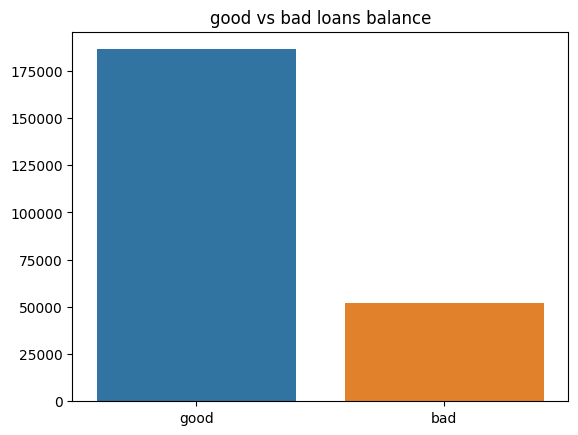

In [17]:
plt.title('good vs bad loans balance')
sns.barplot(x= df3.loan_ending.value_counts().index ,y=df3.loan_ending.value_counts().values)
pass

In [22]:
# Bỏ những cột có giá trị có ý nghĩa trùng nhau
df3 = df3.drop(columns =['funded_amnt','funded_amnt_inv', 'member_id'] )

In [23]:
df3.isnull().sum()/df3.shape[0]

id                           0.000
loan_amnt                    0.000
term                         0.000
int_rate                     0.000
installment                  0.000
grade                        0.000
sub_grade                    0.000
emp_length                   0.038
home_ownership               0.000
annual_inc                   0.000
verification_status          0.000
issue_d                      0.000
loan_status                  0.000
pymnt_plan                   0.000
purpose                      0.000
title                        0.000
addr_state                   0.000
dti                          0.000
delinq_2yrs                  0.000
earliest_cr_line             0.000
inq_last_6mths               0.000
mths_since_last_delinq       0.559
open_acc                     0.000
pub_rec                      0.000
revol_bal                    0.000
revol_util                   0.001
total_acc                    0.000
initial_list_status          0.000
out_prncp           

In [24]:
# 3 cột 'tot_coll_amt','tot_cur_bal','total_rev_hi_lim' có số lượng null khá lớn, chiếm trên khoảng 28%
df3[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']].describe()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,171897.000,171897.000,171897.000
mean,200.701,136573.632,29072.961
std,22135.127,150161.418,28491.999
min,0.000,0.000,0.000
25%,0.000,27975.000,13200.000
50%,0.000,79265.000,22000.000
75%,0.000,206393.000,36100.000
max,9152545.000,8000078.000,2013133.000


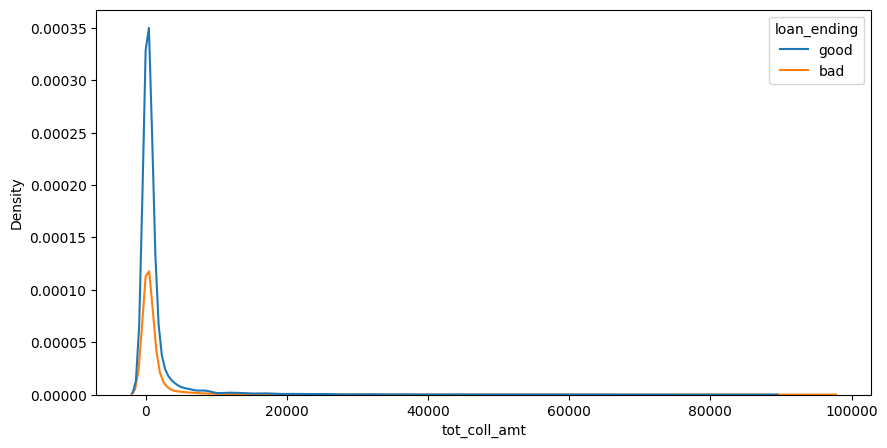

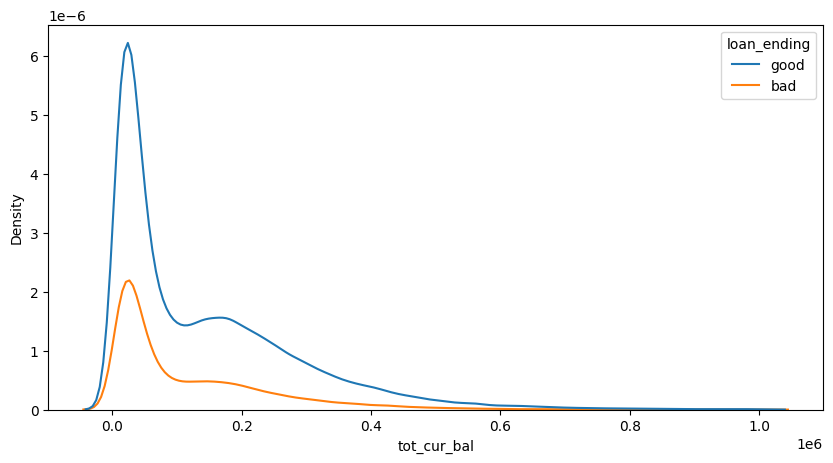

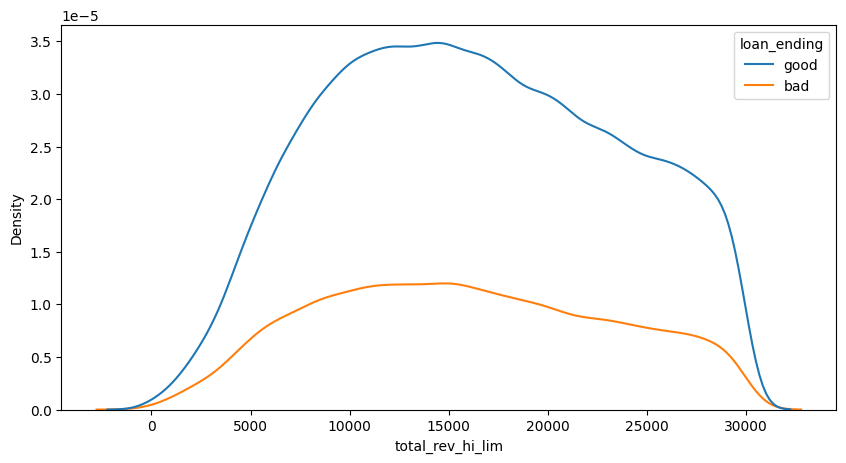

In [25]:
# Đồ thị minh họa 3 cột dữ liệu
plt.figure(figsize = (10,5))
sns.kdeplot(data = df3[(df3['tot_coll_amt']< 100000) &(df3['tot_coll_amt'] >0) ], x ='tot_coll_amt', hue ='loan_ending')

plt.figure(figsize = (10,5))
sns.kdeplot(data= df3[df3['tot_cur_bal'] < 1000000], x='tot_cur_bal', hue='loan_ending')

plt.figure(figsize = (10,5))
sns.kdeplot(data= df3[df3['total_rev_hi_lim'] < 30000], x='total_rev_hi_lim', hue='loan_ending')

pass

### Kết luận
<ul>
    <li> Cột tot_toll_amt có lượng giá trị 0 chiếm ít nhất 75% lượng giá trị
    <li> Giá trị trung bình và giá trị tối đa chênh lệch khá nhiều, nên phân bố dữ liệu không chuẩn
    <li> Biểu đồ phân phối giá trị chia theo chất lượng khoản vay giống nhau, nên không có ý nghĩa thống kê khi đưa vào phân loại
<ul>
=>

Nên loại 3 biến này ra khỏi mô hình

In [26]:
df3 = df3.drop(columns = ['tot_coll_amt','tot_cur_bal','total_rev_hi_lim'])

In [27]:
df3 = df3.drop(columns = 'emp_length')

In [28]:
df3['yr_since_last_inq'] = df3['yr_since_last_inq'].replace(np.nan,0)

In [29]:
df3.isnull().sum()

id                                 0
loan_amnt                          0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
title                             15
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq        133249
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       203
total_acc                          0
initial_list_status                0
o

<li> Do số lượng missing ở 2 cột mths_since_last_deling và next_pymnt_d khá lớn nên ta sẽ bỏ [cột] dữ liệu này
<li> Đối với cột title do không phải là dữ liệu quan trọng nên tương tự ta bỏ [cột] dữ liệu này
<li> Đối với các cột còn lại do số lượng missing thấp nên ta sẽ bỏ các [hàng] chứa missing

In [30]:
df3 = df3.drop(columns =['mths_since_last_delinq','next_pymnt_d','title','loan_status'] )
df3 = df3.dropna()

In [32]:
df3.to_csv('E:\learn st new\Credit score\loan_data_preprocess.csv', index= False)